# Tensorflow Ex-7 Part-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [5]:
x_data
noise

array([ 2.00235724,  0.52627677,  0.50554359, ...,  0.76271962,
       -1.08573376,  2.44319915])

In [6]:
#y = mx + b, b = 5
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])

In [8]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [9]:
x_df.head()
y_df.head()

,Y
0,7.002357
1,5.526282
2,5.505554
3,6.507882
4,4.913331


In [10]:
my_data = pd.concat([x_df,y_df],axis=1)

In [11]:
my_data.head()

,X_Data,Y
0,0.00000,7.002357
1,0.00001,5.526282
2,0.00002,5.505554
3,0.00003,6.507882
4,0.00004,4.913331


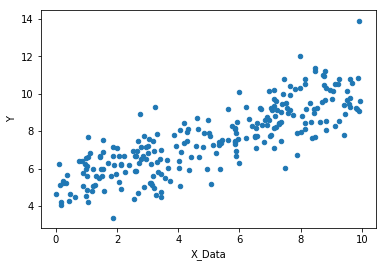

In [12]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')

In [13]:
batch_size = 8

In [14]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [15]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [17]:
#model
y_model = m*xph + b

In [18]:
#Cost Funtion
error = tf.reduce_sum(tf.square(yph-y_model))

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [22]:
init = tf.global_variables_initializer()

In [35]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [36]:
model_m

0.5010009

In [37]:
model_b

4.9562645

In [38]:
y_hat = x_data * model_m + model_b

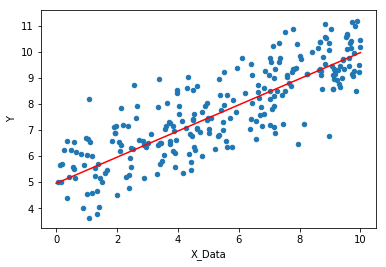

In [39]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')